In [ ]:
## scikit-learn 설치

In [ ]:
pip install -U scikit-learn scipy matplotlib scikit-image

In [10]:
### XOR연산을 학습하는 프로그램
from sklearn import svm

### XOR의 계산 데이터
xor_data=[
    #P,Q,Result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

# 학습을 위해서 데이터와 레이블 분리
data=[]
label=[]
for row in xor_data:
    print(row)
    p=row[0]
    q=row[1]
    re=row[2]
    data.append([p,q])
    label.append(re)

# 데이터 학습 시키기
clf=svm.SVC()
clf.fit(data,label)
# data1=[
#     [0,1],
#     [0,0],
#     [1,0],
#     [1,1]
# ]
#데이터 예측하기
pre=clf.predict(data)
print('예측 결과 : ',pre)

# 결과 확인
ok=0;total=0
for idx,answer in enumerate(label):     # 인덱스와 값 동시에 나오기
    p=pre[idx]
    if p==answer:
        ok+=1
    total+=1
print('정답률: ',ok,'/',total,'=',ok/total)

##SVM알고리즘 장단점
# 장점
# - 비선형 분리데이터를 커널트릭을 사용하여 분류 모델링 가능
# - 고차원 공간에서 원할하게 작동함
# - 텍스트 분류 및 이미지 분류에 효과적임
#단점
# - 대용량 데이터셋 처리에는 많은 시간이 소요(마진 길이가 줄어들기 때문)
# - 확률 추정치를 직접적으로 반환X

[0, 0, 0]
[0, 1, 1]
[1, 0, 1]
[1, 1, 0]
예측 결과 :  [1 0 1 0]
정답률:  2 / 4 = 0.5


In [15]:
import pandas as pd
from sklearn import svm,metrics
### XOR의 계산 데이터
xor_input=[
    #P,Q,Result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
## 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기
xor_df=pd.DataFrame(xor_input)
xor_data=xor_df.iloc[:,0:2]   # 데이터
xor_label=xor_df.iloc[:,2]    #레이블

## 데이터 학습과 예측하기
clf=svm.SVC()
clf.fit(xor_data,xor_label)
pre=clf.predict(xor_data)

# 정답률 구하기
ac_score=metrics.accuracy_score(xor_label,pre)
print('정답률=',ac_score)

정답률= 1.0


In [19]:
import random,re
import pandas as pd
from sklearn import svm,metrics
## 붓꽃 데이터 읽어오기
csv=[]
with open('data/iris.csv','r',encoding='utf8') as fp:
    for line in fp:
        line=line.strip()
        cols=line.split(',')
        ## 문자열 데이터를 숫자로 변환
        fn=lambda n :float(n) if re.match(r'[0-9\.]+$',n) else n
        cols=list(map(fn,cols))
        csv.append(cols)
# 헤더제거
del csv[0]

# 데이터 섞기
random.shuffle(csv)
csv

# 학습 전용 데이터와 테스트 전용 데이터 분할하기(2:1 비율)
total_len=len(csv)
total_len
train_len=int(total_len*2/3)
train_data=[]
train_label=[]
test_data=[]
test_label=[]

for i in range(total_len):
    data=csv[i][0:4]
    label=csv[i][4]
    if i <train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

# 데이터 학습 시키고 예측하기
clf=svm.SVC()
clf.fit(train_data,train_label)
pre=clf.predict(test_data)

# 정답률 구하기
ac_score=metrics.accuracy_score(test_label,pre)
print("정답률 = ",ac_score)

정답률 =  0.92


In [26]:
## iris를 이용한 데이터 처리에서 분할 메서드 사용
import pandas as pd
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split

# 붓꽃 데이터 읽어 들이기(PANDAS)
csv=pd.read_csv('data/iris.csv')

# 필요한 열 추출
csv_data=csv[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
csv_label=csv['Name']

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
train_data,test_data,train_label,test_label=train_test_split(csv_data,csv_label)

# 데이터 학습시키고 예측하기
clf=svm.SVC()
clf.fit(train_data,train_label)
pre=clf.predict(test_data)

# 정답률구하기
ac_score=metrics.accuracy_score(test_label,pre)
print('정답률 =',ac_score)

정답률 = 1.0


In [32]:
## 이미지 내부의 문자 인식
# 사이트 주소 : http://yann.lecun.com/exdb/mnist/

import urllib.request as req
import gzip,os,os.path

savepath='data/mnist'
baseurl='http://yann.lecun.com/exdb/mnist'
files=[
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz'
]

# 다운로드
if not os.path.exists(savepath): 
    os.mkdir(savepath)
for f in files:
    url=baseurl+'/'+f
    loc=savepath+'/'+f
    print('download:',url)
    if not os.path.exists(loc):
        req.urlretrieve(url,loc)



download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


In [33]:
# GZip 압축 해체
for f in files:
    gz_file=savepath+'/'+f
    raw_file=savepath+'/'+f.replace('.gz','')
    print('gzip:',f)
    with gzip.open(gz_file,'rb') as fp:
        body=fp.read()
        with open(raw_file,'wb') as w:
            w.write(body)
print('ok')

gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [45]:
import struct
def to_csv(name,maxdata):
    #레이블 파일과 이미지 파일 열기
    lbl_f=open('data/mnist/'+name+'-labels-idx1-ubyte','rb')
    img_f=open('data/mnist/'+name+'-images-idx3-ubyte','rb')
    csv_f=open('data/mnist/'+name+'.csv','w',encoding='utf8')
    # 헤더정보 읽기
    mag, lbl_count=struct.unpack('>II',lbl_f.read(8))
    mag, img_count=struct.unpack('>II',img_f.read(8))
    rows,cols=struct.unpack('>II',img_f.read(8))
    pixels=rows*cols
    # 이미지 데이터를 읽고 csv로 저장하기
    res=[]
    for idx in range(lbl_count):
        if idx>maxdata:
            break
        label=struct.unpack('B',lbl_f.read(1))[0]
        bdata=img_f.read(pixels)
        sdata=list(map(lambda n: str(n),bdata))
        csv_f.write(str(label)+',')
        csv_f.write(','.join(sdata)+'\r\n')
        # 잘 저장되었는지 이미지 파일로 저장해서 테스트하기
        if  idx<10:
            s='P2 28 28 255\n'
            s+=''.join(sdata)
            iname='data/mnist/{0}-{1}-{2}.pgm'.format(name,idx,label)
            with open(iname,'w',encoding='utf8') as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()

to_csv('train',1000)
to_csv('t10k',500)
  



In [53]:
### 이미지 데이터 학습 시키기
# 1. csv 파일에서 학습 데이터와 테스트 데이터 읽기
# 2. 학습 데이터를 사용해 이미지 픽셀을 학습시킵니다.
# 3. 테스트 데이터를 활용해 예측합니다.
# 4. 예측 결과와 답을 비교해서 정답률을 구합니다..
from sklearn import model_selection,svm,metrics
# 1. csv 파일에서 학습 데이터와 테스트 데이터 읽기
def load_csv(fname):
    labels=[]
    images=[]
    with open(fname,'r') as f:
        for line in f:
            cols=line.split(',')
            if len(cols)<2:
                continue
            labels.append(int(cols.pop(0)))
            vals=list(map(lambda n:int(n)/256,cols))
            images.append(vals)
    return {'labels':labels,'images':images}

data=load_csv('data/mnist/train.csv')
test=load_csv('data/mnist/t10k.csv')

# 2. 학습 시키기
clf=svm.SVC()
clf.fit(data['images'],data['labels'])

# 3. 예측하기
predict=clf.predict(test['images'])

# 4. 결과 확인
ac_score=metrics.accuracy_score(test['labels'],predict)
cl_report=metrics.classification_report(test['labels'],predict)
print('정답률=',ac_score)
print('리포트=')
print(cl_report)

정답률= 0.8842315369261478
리포트=
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      1.00      0.99        67
           2       0.91      0.89      0.90        55
           3       0.94      0.72      0.81        46
           4       0.86      0.93      0.89        55
           5       0.75      0.82      0.78        50
           6       0.95      0.81      0.88        43
           7       0.79      0.94      0.86        49
           8       0.94      0.82      0.88        40
           9       0.89      0.87      0.88        54

    accuracy                           0.88       501
   macro avg       0.89      0.88      0.88       501
weighted avg       0.89      0.88      0.88       501



In [67]:
## 외국어 판별을 위한 프로그램
from sklearn import svm, metrics
import glob, os.path, re, json

## 텍스트를 읽어 들이고, 출현 빈도 조사
def check_freq(fname):
    name=os.path.basename(fname)
    lang=re.match(r'^[a-z]{2,}',name).group()
    with open(fname,'r',encoding='utf-8') as f:
        text=f.read()
    text=text.lower()       # 소문자 변환
    
    #숫자 세기 변수(cnt) 초기화 하기
    cnt=[0 for n in range(0,26)]    # 알파벳 숫자만큼 초기값 설정 0 26개
    code_a=ord('a')
    code_z=ord('z')
    # 알파벳 출현 횟수 구하기
    for ch in text:
        n=ord(ch)
        if code_a<=n<=code_z:
            cnt[n-code_a]+=1
    # 정규화 작업
    total=sum(cnt)
    freq=list(map(lambda n: n/total,cnt))
    return (freq,lang)

# 각 파일 처리하기
def load_files(path):
    freqs=[]
    labels=[]
    file_list=glob.glob(path)
    for fname in file_list:
        r=check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs,'labels':labels}

data=load_files('data/lang/train/*.txt')
test=load_files('data/lang/test/*.txt')

# 이후를 대비해서 json으로 결과 저장
with open('data/lang/freq.json','w',encoding='utf8') as fp:
    json.dump([data,test],fp)

#학습하기
clf=svm.SVC()
clf.fit(data['freqs'],data['labels'])

# 예측하기
predict=clf.predict(test['freqs'])

# 결과 테스트하기
ac_score=metrics.accuracy_score(test['labels'],predict)
cl_report=metrics.classification_report(test['labels'],predict)
print('정답률=',ac_score)
print('리포트=')
print(cl_report)

정답률= 1.0
리포트=
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



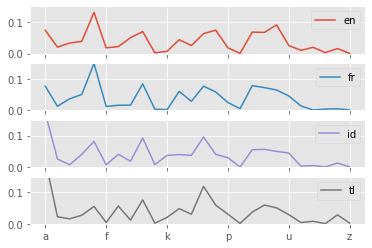

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# 알파벳 출현 빈도 데이터 읽어오기
with open('data/lang/freq.json','r',encoding='utf8') as fp:
    freq=json.load(fp)
# 언어마다 계산하기
lang_dic={}
for i, lbl in enumerate(freq[0]['labels']):
    fq=freq[0]['freqs'][i]
    if not (lbl in lang_dic):
        lang_dic[lbl]=fq
        continue
    for idx,v in enumerate(fq):
        lang_dic[lbl][idx]=(lang_dic[lbl][idx]+v)/2
        
# pandas에 넣기
asclist=[chr(n) for n in range(97,97+26)]
df=pd.DataFrame(lang_dic,index=asclist)

# 그래프 그리기
plt.style.use('ggplot')
df.plot(kind='line',subplots=True,ylim=(0,0.15))
plt.savefig('data/lang/lang-plot.png')
plt.show()

In [99]:
## 학습한 매개변수를 저장하는 프로그램

from sklearn import svm
import joblib
import json
# 각 언어 출현빈도 데이터 읽어 들이기
with open('data/lang/freq.json','r',encoding='utf8') as fp:
    d=json.load(fp)
    data=d[0]
# 데이터 학습하기
clf=svm.SVC()
clf.fit(data['freqs'],data['labels'])
# 학습 데이터 저장하기
joblib.dump(clf,'data/lang/freq.pkl')
print('ok')



ok


In [ ]:
#!/usr/bin/env python3
import cgi, os.path
import joblib
# 학습 데이터 읽어 들이기
pklfile = "freq.pkl"
clf = joblib.load(pklfile)
# 텍스트 입력 양식 출력하기
def show_form(text, msg=""):
    print("Content-Type: text/html; charset=utf-8")
    print("")
    print("""
        <html><body><form>
        <textarea name="text" rows="8" cols="40">{0}</textarea>
        <p><input type="submit" value="판정"></p>
        <p>{1}</p>
        </form></body></html>
    """.format(cgi.escape(text), msg))
# 판정하기
def detect_lang(text):
    # 알파벳 출현 빈도 구하기
    text = text.lower() 
    code_a, code_z = (ord("a"), ord("z"))
    cnt = [0 for i in range(26)]
    for ch in text:
        n = ord(ch) - code_a
        if 0 <= n < 26: cnt[n] += 1
    total = sum(cnt)
    if total == 0: return "입력이 없습니다"
    freq = list(map(lambda n: n/total, cnt))
    # 언어 예측하기
    res = clf.predict([freq])
    # 언어 코드를 한국어로 변환하기
    lang_dic = {"en":"영어","fr":"프랑스어",
        "id":"인도네시아어", "tl":"타갈로그어"}
    return lang_dic[res[0]]
# 입력 양식의 값 읽어 들이기
form = cgi.FieldStorage()
text = form.getvalue("text", default="")
msg = ""
if text != "":
    lang = detect_lang(text)
    msg = "판정 결과:" + lang
# 입력 양식 출력
show_form(text, msg)

In [101]:
## BMI 활용해 비만 측정
import random
# BMI를 계산해서 레이블을 리턴하는 함수
def cal_bmi(h,w):
    bmi=w/(h/100)**2
    if bmi <18.5:
        return 'thin'
    if bmi<25:
        return 'normal'
    return 'fat'
# 출력파일 준비하기
fp=open('bmi.csv','w',encoding='utf8')
fp.write('height,weight,label\r\n')

#무작위로 데이터 생성
cnt={'thin':0,'normal':0,'fat':0}
for i in range(20000):
    h=random.randint(120,200)
    w=random.randint(35,80)
    label=cal_bmi(h,w)
    cnt[label]+=1
    fp.write(f"{h},{w},{label}\r\n")
fp.close()
print('ok',cnt)

ok {'thin': 6332, 'normal': 5968, 'fat': 7700}


In [103]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기
tbl=pd.read_csv('bmi.csv')

# 컬럼 자르고 정규화
label=tbl['label']
w=tbl['weight']/100 #최대 100키로라고 가정
h=tbl['height']/200 #최대 200cm라고 가정
wh=pd.concat([w,h],axis=1)

#학습과 테스트로 데이터 나누기
data_train,data_test,label_train,label_test=train_test_split(wh,label)

# 데이터 학습
clf=svm.SVC()
clf.fit(data_train,label_train)

#데이터 예측
predict=clf.predict(data_test)

#결과 테스트
ac_score=metrics.accuracy_score(label_test,predict)
cl_report=metrics.classification_report(label_test,predict)
print('정답률=',ac_score)
print('리포트=\n',cl_report)

정답률= 0.9954
리포트=
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1930
      normal       0.99      0.99      0.99      1504
        thin       1.00      0.99      1.00      1566

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



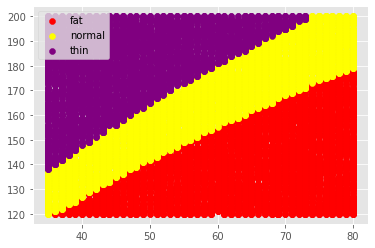

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

#pandas로 csv 파일 읽어들이기
tbl=pd.read_csv('bmi.csv',index_col=2)

#그래프 그리기 시작
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl,color):
    b=tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label=lbl)
scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')

ax.legend()
plt.savefig('bmi-test.png')
plt.show()